# Predicting Movie Success..!

## 1. Introduction: 

Our client, a major film studio, aims to enhance their understanding of factors influencing movie success and improve prediction models for IMDB ratings. They want to leverage advanced data analysis techniques and machine learning to analyze movie characteristics and predict whether a movie will be a hit, average, or flop based on IMDB scores.

### 1.1 Data-Description

The dataset contains 28 variables for 5043 movies, spanning across 100 years in 66 countries. There are 2399 unique director names, and thousands of actors/actresses. “imdb_score” is the response variable while the other 27 variables are possible predictors.

## 2.	Data Exploration: 

Conduct comprehensive EDA using visualization techniques to understand feature distributions and relationships with IMDB scores.

### 2.1 Import necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")

- Readings from the dataset

In [3]:
data = pd.read_csv('D:\Predicting-Movie-Success\Dataset\movie_metadata.csv')
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


### 2.2 Categorizing the target varible
Here we are categorizing the target variable in such a way that IMDB score between 1 and 3 is FLOP , between 3 and 6 is AVG, between 6 and 10 is HIT.

And we are using binning in pandas to acheive this.

In [4]:
#Categorising the target varible 
bins = [ 1, 3, 6, 10]
labels = ['FLOP', 'AVG', 'HIT']
data['imdb_success'] = pd.cut(data['imdb_score'], bins=bins, labels=labels)

- ### Barplot of imbd_success column

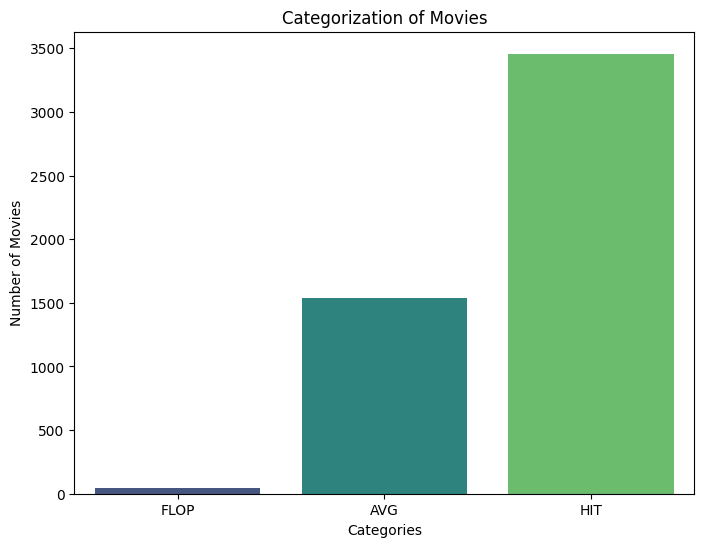

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='imdb_success', palette='viridis')  # Customize the palette as needed
plt.xlabel('Categories', fontsize=10)
plt.ylabel('Number of Movies', fontsize=10)
plt.title('Categorization of Movies', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [6]:
#Checking the new column
data.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdb_success
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,HIT
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,HIT
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,HIT
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,HIT
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,HIT


### Our dataset contains 5043 samples(rows) and 28 variables(columns)

In [7]:
#Shape of the dataset
data.shape

(5043, 29)

### 2.3 Handling the Missing values

Every datset have some missing values, lets find out in which cloumns they are?

In [8]:
#Total null values present in each column
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
imdb_success                   0
dtype: int64

Dropping all the samples that having missing values

In [9]:
#Droping the samples that have missing values
data.dropna(inplace=True)

In [10]:
#Final shape of the data after Droping missing values
data.shape

(3755, 29)

In [11]:
#List of variables in the datset
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'imdb_success'],
      dtype='object')

Lets find out how the string variables are behaving

In [12]:
#Describing the categorical data
data.describe(include='object')

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755
unique,2,1658,2187,745,1427,3654,2586,3655,3655,33,45,12
top,Color,Steven Spielberg,Morgan Freeman,Comedy|Drama|Romance,Robert De Niro,Pan,Steve Coogan,animal name in title|ape abducts a woman|goril...,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,English,USA,R
freq,3631,25,20,147,42,3,8,3,3,3598,2986,1700


'movie_title','movie_imdb_link' columns are almost unique,so they doesn't contribute in predicting target variable

In [13]:
data.drop(columns=['movie_title','movie_imdb_link'],inplace=True)

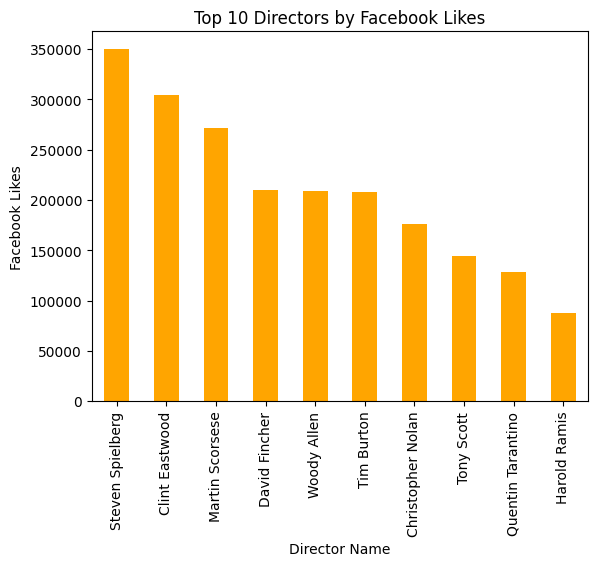

In [14]:
top_directors = data.groupby('director_name')['director_facebook_likes'].sum().sort_values(ascending=False).head(10)
top_directors.plot(kind='bar', color='orange')
plt.title('Top 10 Directors by Facebook Likes')
plt.xlabel('Director Name')
plt.ylabel('Facebook Likes')
plt.show()


### Genre Popularity
Bar Plot: Count of movies per genre:

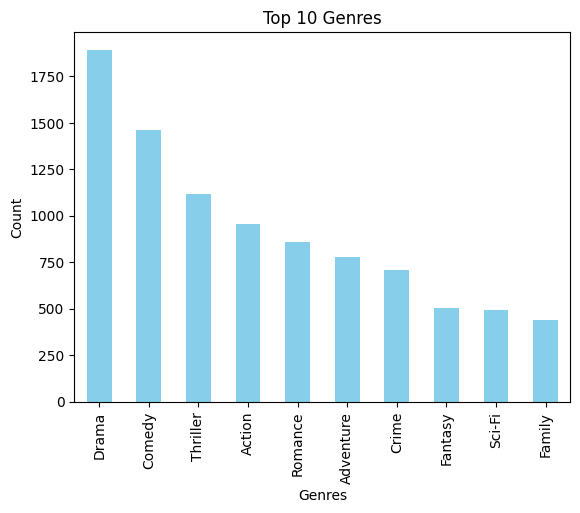

In [15]:
genre_counts = data['genres'].str.split('|').explode().value_counts().head(10)
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.show()


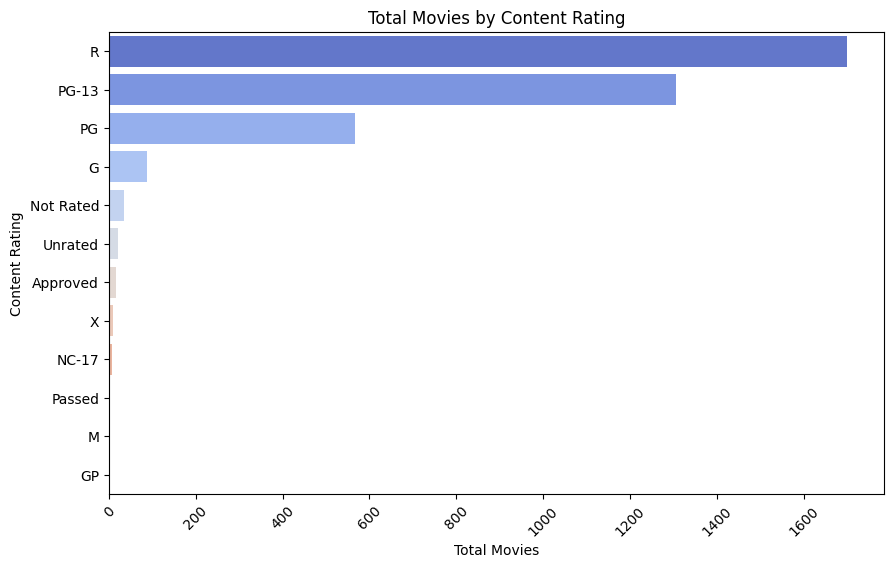

In [16]:
content_rating_count = data['content_rating'].value_counts()

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(y=content_rating_count.index, x=content_rating_count.values, palette='coolwarm')
plt.title('Total Movies by Content Rating')
plt.ylabel('Content Rating')
plt.xlabel('Total Movies')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

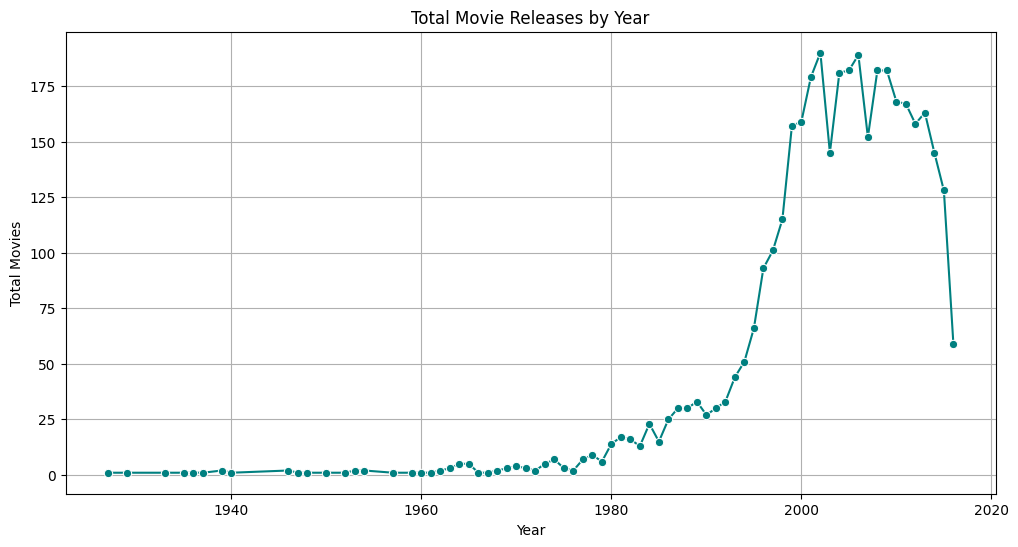

In [17]:
movies_per_year = data['title_year'].value_counts().sort_index()

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, marker='o', color='teal')
plt.title('Total Movie Releases by Year')
plt.xlabel('Year')
plt.ylabel('Total Movies')
plt.grid(True)
plt.show()

In [18]:
# Count total movies by country
movies_by_country = data['country'].value_counts().reset_index()
movies_by_country.columns = ['country', 'total_movies']

# World Map Visualization
fig = px.choropleth(movies_by_country, 
                    locations='country', 
                    locationmode='country names', 
                    color='total_movies',
                    title='Total Movies by Country',
                    color_continuous_scale='Viridis')
fig.show()